In [10]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from sklearn import metrics
from sklearn.externals import joblib
from os import listdir

In [11]:
MODEL_DIRECTORY = "models/"
TEST_DATA = "test_data.p"

In [12]:
test_data = joblib.load(TEST_DATA)
X_test = test_data.data
y_test = test_data.target

In [13]:
models = listdir(MODEL_DIRECTORY)

In [14]:
results = []
for m in models:
    name = ".".join(m.split(".")[:-1])
    model = joblib.load(MODEL_DIRECTORY + m)
    predictions = model.predict(X_test)
    predictions_proba = model.predict_proba(X_test)
    # metrics
    model_accuracy = model.score(X_test, y_test)
    model_log_loss = metrics.log_loss(y_test, predictions_proba)
    model_precision = metrics.precision_score(y_test, predictions, average='micro')
    model_recall = metrics.recall_score(y_test, predictions, average='micro')
    model_confusion = metrics.confusion_matrix(y_test, predictions)
    model_results = {'name': name, 
                     'predictions': predictions,
                     'predictions_proba': predictions_proba,
                     'accuracy': model_accuracy, 
                     'avg_log_loss': model_log_loss,
                     'precision': model_precision,
                     'recall': model_recall,
                     'confusion_matrix': model_confusion,
                    }
    results.append(model_results)

In [15]:
accuracy_leaderboard = sorted([(r['name'], r['accuracy']) for r in results], 
                            key=lambda x : x[1], reverse=True)
log_loss_leaderboard = sorted([(r['name'], r['avg_log_loss']) for r in results], 
                            key=lambda x: x[1])
precision_leaderboard = sorted([(r['name'], r['precision']) for r in results], 
                             key=lambda x: x[1], reverse=True)
recall_leaderboard = sorted([(r['name'], r['recall']) for r in results], 
                          key=lambda x: x[1], reverse=True)

In [17]:
def plot_leaderboard(leaderboard):
    ax = plt.subplot()
    ax.bar(left=range(len(leaderboard)), 
        height=[i[1] for i in leaderboard],
        width=1/1.5, color='black', align='center')
    ax.set_ylim(min([i[1] for i in leaderboard]) - 0.02,
           max([i[1] for i in leaderboard]) + 0.02)
    ax.set_xticks(range(len(leaderboard)))
    ax.set_xticklabels([i[0] for i in leaderboard])
    plt.show()

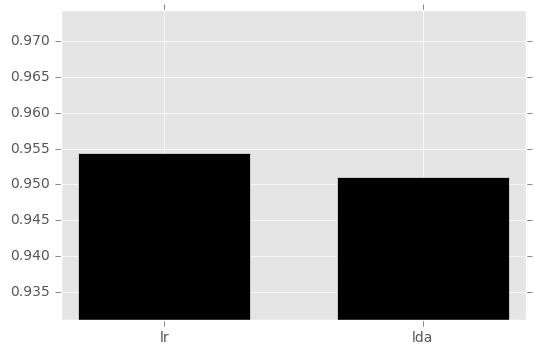

In [19]:
plot_leaderboard(accuracy_leaderboard)

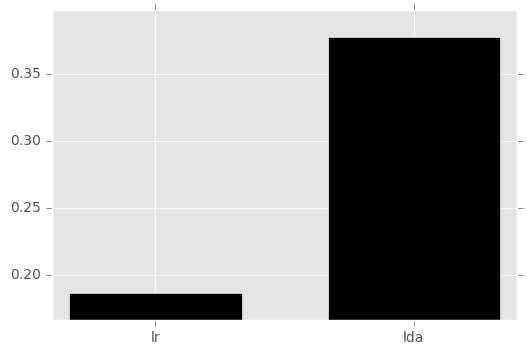

In [20]:
plot_leaderboard(log_loss_leaderboard)